# I-LOFAR SST Tutorial 

This tutorial is based on that of Derek McKay and can be found [here](https://www.dropbox.com/s/cgcn1nbqylzq8fe/KAIRA-UIT-DAT-506.zip?dl=0) for further reference. 

The following tutorial is aimed at familiarising the user with subband statistics (SST) data produced by the I-LOFAR station. SST data is the average power per subband that an antenna (or set of antennas) receives, integrated over a specified time period.

SST data is a useful diagnostic tool for inspecting the station's radio environment and identifying possible sources of RFI (Radio Frequency Interference). 



## Exercise 1: Inspecting an SST file

In [86]:
#importing Python modules
import os
import sys
import struct
import numpy as np
import matplotlib.pyplot as plt
import glob

List the contents of the directory 'SST_data'and inspect the filenames. 
Remember SST files contain no header information. 

>**What information can we gather about the SST file from its name?**

In [23]:
input_dir="/Users/aoiferyan/Documents/presentations/I-LOFAR_Workshop_March_2020/SST_tutorial/"
!ls {input_dir + 'SST_data'}

20181012_111501_sst_rcu000.dat 20181012_112017_sst_rcu000.dat
20181012_111724_sst_rcu000.dat 20181012_112240_sst_rcu000.dat


Now to have a look at what's inside one of these SST files...

> **(1) Get the file size (using python package os)**

> **(2) Knowing this observation was in 8-bit mode, can you calculate the actual length of the data? (Hint: This observation was made in 8-bit mode.)**

> **(3) As there are 512 subbands in each mode, can you find out the number of timesteps?**

In [26]:
filename = input_dir + 'SST_data/' + '20181012_111501_sst_rcu000.dat'   
filelen = os.path.getsize(filename)
datalen = filelen//8     # 8 bytes per double-precision number
num_subbands = 512
num_records = datalen//num_subbands

print('Filename = ', filename)
print('File Length = ', filelen)
print('Length of Array = ', datalen)
print('Number of timesteps = ', num_records)


Filename =  /Users/aoiferyan/Documents/presentations/I-LOFAR_Workshop_March_2020/SST_data/20181012_111501_sst_rcu000.dat
File Length =  491520
Length of Array =  61440
Number of timesteps =  120


As there is no header information provided by an SST file, one would have to know the integration or duration of the observation in order to determine the number of seconds represented by a single timestep.
The default is 1 second integration, which has been used for this observation. 

## Exercise 2: Plotting a 1-D spectrum

Now that we have found out some details about our SST we want to plot a 1-dimensional spectrum in order to inspect further. 

> **Firstly, open the file and unpack its contents. Print the length of the array.**
(**_Hint: Python's "struct.unpack" will help you here_**)

In [47]:
# Read the contents of the file
fp = open(filename, 'rb')
datastruct = str(datalen)+'d'
dataraw = struct.unpack(datastruct,fp.read(filelen))
fp.close()

print(len(dataraw))

61440


This is a 1-dimensional array or list of numbers. We want to shape this so that it is a 2-dimensional array. 

> **Reshape the 1-dimensional array so that it's shape reflects the number of timesteps and number of subbands we found in Exercise 1.**

> **Print the shape of the new 2-dimensional array**

In [49]:
# Re-organise the raw data into a 2D array
data = np.reshape( dataraw, (num_records,num_subbands) )
print(data.shape)

(120, 512)


From looking at the shape of the 2-D array above we can see that time is on the x-axis and subband number is on the y-axis. However, it is typical to have the subbands displayed on the x-axis. 
> **Transpose the 2-D array so that time is now on the y-axis and subband number is on the x-axis. Print the array shape to make sure it was completed correctly.**

In [50]:
# Switch the axes, so that xaxis=sample (i.e. time) and yaxis=subbands (freq.)
data = np.transpose(data)
print(data.shape)

(512, 120)


In order to display the spectrum we need to average over the integration time. 
>**Average over the y-axis.**

In [52]:
# Average the data in the time-axis
average=np.mean(data, axis=1)

It's now time to plot!!

>**Plot the averaged intensity using Python's Matplotlib.**

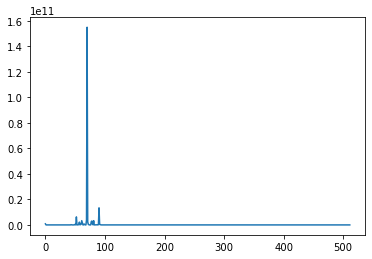

In [53]:
# Plot the results
plt.plot(average)
plt.show()


Now you have a spectrum! However, many of the features are somewhat difficult to distinguish. 

>**Can you think of a way of plotting the data so that the smaller features are enhanced?**

> **Implement and plot again, this time remember to label your axes!**

> **Save the figure to your working directory.**

In [59]:
# Re-organise the raw data into a 2D array
data = np.reshape( dataraw, (num_records,num_subbands) )

# Switch the axes, so that xaxis=sample (i.e. time) and yaxis=subbands (freq.)
data = np.transpose(data)

# Use decibels, not linear scale
data = 10*np.log10(data)

# Average the data in the time-axis
average=np.mean(data, axis=1)

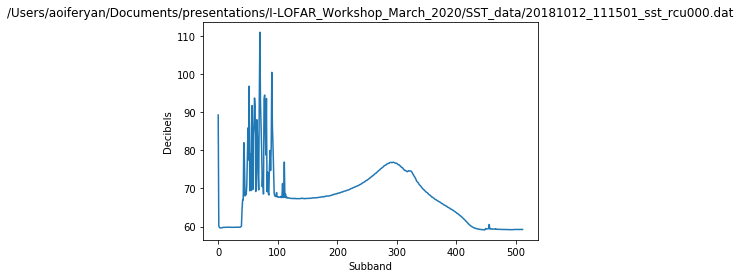

In [60]:
# Plot the results
plt.plot(average)
plt.xlabel("Subband")
plt.ylabel("Decibels")
plt.title(filename)
plt.show()

## Exercise 3: Identifying different observing modes

It is now time to repeat this process for each of the other files in the directory 'SST_data'. 
>**Produce a plot for each SST file and save to your working directory**

>**What are the differences between the plots?**

>**Even though there is no header information, can you identify which mode each file corresponds to?**

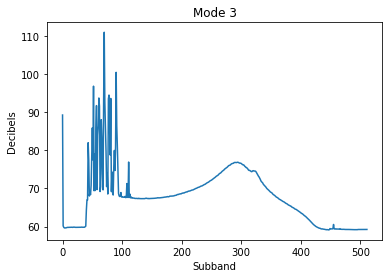

In [61]:
### MODE 3 ###

# Find the SST file
filename = input_dir + 'SST_data/' + '20181012_111501_sst_rcu000.dat'

# Get the filesize, and thus work out how many records to expect
filelen = os.path.getsize(filename)
datalen=filelen//8     # 8 bytes per double-precision number
num_subbands=512
num_records=datalen//num_subbands

# Read the contents of the file
fp = open(filename, 'rb')
datastruct = str(datalen)+'d'
dataraw = struct.unpack(datastruct,fp.read(filelen))
fp.close()

# Re-organise the raw data into a 2D array
data = np.reshape( dataraw, (num_records,num_subbands) )

# Switch the axes, so that xaxis=sample (i.e. time) and yaxis=subbands (freq.)
data = np.transpose(data)

# Use decibels, not linear scale
data = 10*np.log10(data)

# Average the data in the time-axis
average=np.mean(data, axis=1)

# Plot the results
plt.plot(average)
plt.xlabel("Subband")
plt.ylabel("Decibels")
plt.title('Mode 3')
plt.show()

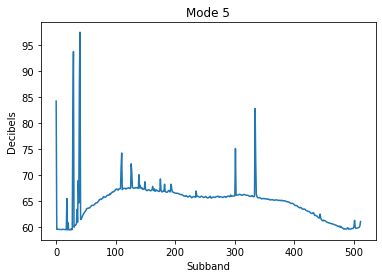

In [63]:
### MODE 5 ###

# Find the SST file
filename = input_dir + 'SST_data/' + '20181012_111724_sst_rcu000.dat'

# Get the filesize, and thus work out how many records to expect
filelen = os.path.getsize(filename)
datalen=filelen//8     # 8 bytes per double-precision number
num_subbands=512
num_records=datalen//num_subbands

# Read the contents of the file
fp = open(filename, 'rb')
datastruct = str(datalen)+'d'
dataraw = struct.unpack(datastruct,fp.read(filelen))
fp.close()

# Re-organise the raw data into a 2D array
data = np.reshape( dataraw, (num_records,num_subbands) )

# Switch the axes, so that xaxis=sample (i.e. time) and yaxis=subbands (freq.)
data = np.transpose(data)

# Use decibels, not linear scale
data = 10*np.log10(data)

# Average the data in the time-axis
average=np.mean(data, axis=1)

# Plot the results
plt.plot(average)
plt.xlabel("Subband")
plt.ylabel("Decibels")
plt.title('Mode 5')
plt.show()

491520 61440


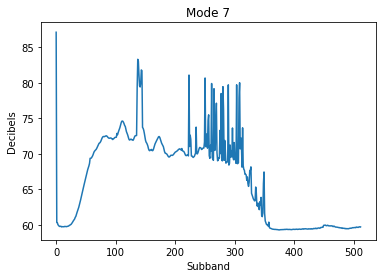

In [75]:
### MODE 7 ###

# Find the SST file
filename = input_dir + 'SST_data/' + '20181012_112240_sst_rcu000.dat'

# Get the filesize, and thus work out how many records to expect
filelen = os.path.getsize(filename)
datalen=filelen//8     # 8 bytes per double-precision number
num_subbands=512
num_records=datalen//num_subbands

# Read the contents of the file
fp = open(filename, 'rb')
datastruct = str(datalen)+'d'
dataraw = struct.unpack(datastruct,fp.read(filelen))
fp.close()

# Re-organise the raw data into a 2D array
data = np.reshape( dataraw, (num_records,num_subbands) )

# Switch the axes, so that xaxis=sample (i.e. time) and yaxis=subbands (freq.)
data = np.transpose(data)

# Use decibels, not linear scale
data = 10*np.log10(data)

# Average the data in the time-axis
average=np.mean(data, axis=1)

# Plot the results
plt.plot(average)
plt.xlabel("Subband")
plt.ylabel("Decibels")
plt.title('Mode 7')
plt.show()

As discussed at the beginning of this session, each of these modes corresponds to a different frequency range. 
> **Using Table 1 below can you change the x-axis of each of the spectra above to more accurately represent the data and its frequency range.**

> **Additionally, try plotting all three modes on the same plot with the correct x-axis.**

| Mode | Frequency Range (MHz) |
| --- | --- |
| 3 | 10-90 |
| 4 | 30-90 |
| 5 | 110-190 |
| 6 | 170-230 |
| 7 | 210-270 |
Table 1.

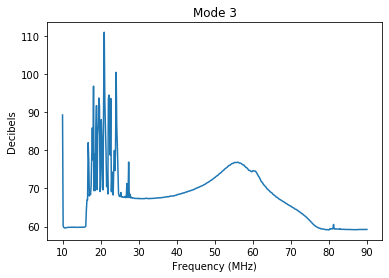

In [84]:
### MODE 3 ###

# Find the SST file
filename = input_dir + 'SST_data/' + '20181012_111501_sst_rcu000.dat'

# Get the filesize, and thus work out how many records to expect
filelen = os.path.getsize(filename)
datalen=filelen//8     # 8 bytes per double-precision number
num_subbands=512
num_records=datalen//num_subbands

# Read the contents of the file
fp = open(filename, 'rb')
datastruct = str(datalen)+'d'
dataraw = struct.unpack(datastruct,fp.read(filelen))
fp.close()

# Re-organise the raw data into a 2D array
data = np.reshape( dataraw, (num_records,num_subbands) )

# Switch the axes, so that xaxis=sample (i.e. time) and yaxis=subbands (freq.)
data = np.transpose(data)

# Use decibels, not linear scale
data = 10*np.log10(data)

# Average the data in the time-axis
average=np.mean(data, axis=1)

# Finding the frequency range
freq = [i for i in np.linspace(10,90, num_subbands)]

# Plot the results
plt.plot(freq, average)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Decibels")
plt.title('Mode 3')
plt.show()

/Users/aoiferyan/Documents/presentations/I-LOFAR_Workshop_March_2020/SST_data/20181012_112240_sst_rcu000.dat
/Users/aoiferyan/Documents/presentations/I-LOFAR_Workshop_March_2020/SST_data/20181012_111724_sst_rcu000.dat
/Users/aoiferyan/Documents/presentations/I-LOFAR_Workshop_March_2020/SST_data/20181012_111501_sst_rcu000.dat


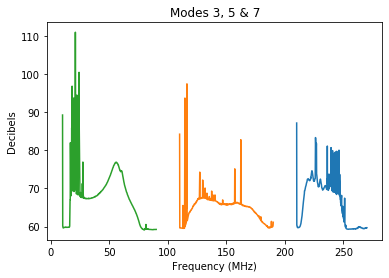

In [127]:
### MODE 3,5,7 ###

# Find the SST file
filenames = glob.glob(input_dir + 'SST_data/' + '20181012_*.dat')

def file_details(filename):
    # Get the filesize, and thus work out how many records to expect
    filelen = os.path.getsize(filename)
    datalen=filelen//8     # 8 bytes per double-precision number
    num_subbands=512
    num_records=datalen//num_subbands


    # Read the contents of the file
    fp = open(filename, 'rb')
    datastruct = str(datalen)+'d'
    dataraw = struct.unpack(datastruct,fp.read(filelen))
    fp.close()

    
    # Re-organise the raw data into a 2D array
    data = np.reshape( dataraw, (num_records,num_subbands) )

    # Switch the axes, so that xaxis=sample (i.e. time) and yaxis=subbands (freq.)
    data = np.transpose(data)

    # Use decibels, not linear scale
    data = 10*np.log10(data)

    # Average the data in the time-axis
    average=np.mean(data, axis=1)
    
    return average

    
# Finding the frequency range
freq_3 = [i for i in np.linspace(10,90, num_subbands)]
freq_5 = [i for i in np.linspace(110,190, num_subbands)]
freq_7 = [i for i in np.linspace(210,270, num_subbands)]
freq = [freq_7, freq_5, freq_3]

for i in range(len(filenames)):
    print(filenames[i])
    average = file_details(filenames[i])

    # Plot the results
    plt.plot(freq[i], average)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Decibels")
plt.title('Modes 3, 5 & 7')
plt.show()


## Exercise 4: Mode 6

Next task is to have a look at mode 6. 
>**Repeat the steps above to plot the spectrum for mode 6, sst file found at 'SST/mode6/'.**

>**Estimate the usable frequency range of RCU Mode 6.** 

>**As mentioned earlier, mode 6 is unique as it uses a different sampling clock frequency. What is the bandwidth of a single subband with sampling clock frequency of 160MHz and 200 MHz?**


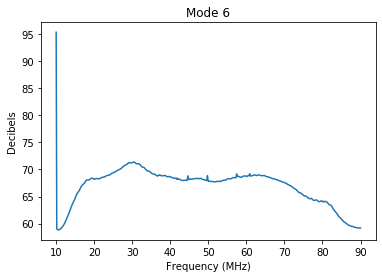

In [126]:
### MODE 6 ###

# Find the SST file
filename = input_dir + 'SST_data/mode_6/' + '20130619_234907_sst_rcu022.dat'

# Get the filesize, and thus work out how many records to expect
filelen = os.path.getsize(filename)
datalen=filelen//8     # 8 bytes per double-precision number
num_subbands=512
num_records=datalen//num_subbands

# Read the contents of the file
fp = open(filename, 'rb')
datastruct = str(datalen)+'d'
dataraw = struct.unpack(datastruct,fp.read(filelen))
fp.close()

# Re-organise the raw data into a 2D array
data = np.reshape( dataraw, (num_records,num_subbands) )

# Switch the axes, so that xaxis=sample (i.e. time) and yaxis=subbands (freq.)
data = np.transpose(data)

# Use decibels, not linear scale
data = 10*np.log10(data)

# Average the data in the time-axis
average=np.mean(data, axis=1)

# Finding the frequency range
freq = [i for i in np.linspace(10,90, num_subbands)]

# Plot the results
plt.plot(freq, average)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Decibels")
plt.title('Mode ')
plt.show()

## Exercise 5: Comparing data from different stations

Subband statistics are very useful for RFI (Radio Frequency Interference) identification. From looking at specta one can identify if a source of RFI is long-lived or transient and at what frequency it occurs. In general, I-LOFAR experiences a very quiet radio environment. In order to test this, let's compare I-LOFAR to another station, KAIRA. The Kilpisjärvi Atmospheric Imaging Receiver Array (KAIRA) is a radio telescope located in north-west Finland. It is used for geophysical and astronomical research (Vierinen et al., 2012). It was constructed using the same hardware technology as LOFAR, but is not part of the LOFAR network.

>**Plot the KAIRA spectrum, 'SST_data/KAIRA/20140430_153356_sst_rcu064.dat'.**

>**What mode was this observation made with?**

>**Modify your script to plot a I-LOFAR spectrum in the same mode on the same plot.**

>**Can you identify any RFI in either of the two spectra? What frequencies?**

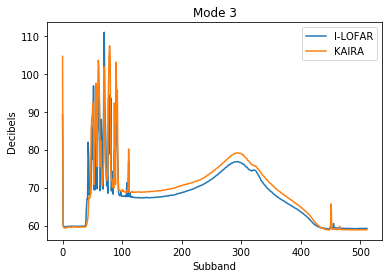

In [133]:
### MODE 3 - KAIRA & I-LOFAR###

# Find the SST file
filename_ILOFAR = input_dir + 'SST_data/' + '20181012_111501_sst_rcu000.dat'
filename_KAIRA = input_dir + 'SST_data/KAIRA/' + '20140430_153356_sst_rcu064.dat'


def file_details(filename):
    # Get the filesize, and thus work out how many records to expect
    filelen = os.path.getsize(filename)
    datalen=filelen//8     # 8 bytes per double-precision number
    num_subbands=512
    num_records=datalen//num_subbands


    # Read the contents of the file
    fp = open(filename, 'rb')
    datastruct = str(datalen)+'d'
    dataraw = struct.unpack(datastruct,fp.read(filelen))
    fp.close()

    
    # Re-organise the raw data into a 2D array
    data = np.reshape( dataraw, (num_records,num_subbands) )

    # Switch the axes, so that xaxis=sample (i.e. time) and yaxis=subbands (freq.)
    data = np.transpose(data)

    # Use decibels, not linear scale
    data = 10*np.log10(data)

    # Average the data in the time-axis
    average=np.mean(data, axis=1)
    
    return average

average_ILOFAR = file_details(filename_ILOFAR)
average_KAIRA = file_details(filename_KAIRA)

# Plot the results
plt.plot(average_ILOFAR, label = 'I-LOFAR')
plt.plot(average_KAIRA, label = 'KAIRA')
plt.xlabel("Subband")
plt.ylabel("Decibels")
plt.title('Mode 3')
plt.legend()
plt.show()

>**Repeat the above steps for SST_DATA/KAIRA/20130326_001420_sst_rcu080.dat and plot the spectrum on the same figure as above.**

>**This is also a spectrum from KAIRA. Does it look the same? Are there any differences?**

>**What is the reason for any differences observed? (Hint: at what frequency are these differences occurring?)**




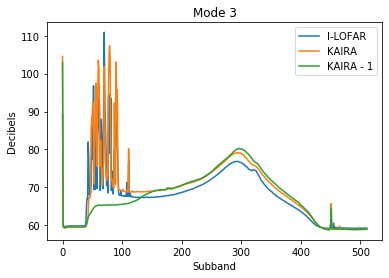

In [135]:
### MODE 3 - KAIRA & I-LOFAR###

# Find the SST file
filename_ILOFAR = input_dir + 'SST_data/' + '20181012_111501_sst_rcu000.dat'
filename_KAIRA = input_dir + 'SST_data/KAIRA/' + '20140430_153356_sst_rcu064.dat'
filename_KAIRA_1 = input_dir + 'SST_data/KAIRA/' + '20130326_001420_sst_rcu080.dat'



def file_details(filename):
    # Get the filesize, and thus work out how many records to expect
    filelen = os.path.getsize(filename)
    datalen=filelen//8     # 8 bytes per double-precision number
    num_subbands=512
    num_records=datalen//num_subbands


    # Read the contents of the file
    fp = open(filename, 'rb')
    datastruct = str(datalen)+'d'
    dataraw = struct.unpack(datastruct,fp.read(filelen))
    fp.close()

    
    # Re-organise the raw data into a 2D array
    data = np.reshape( dataraw, (num_records,num_subbands) )

    # Switch the axes, so that xaxis=sample (i.e. time) and yaxis=subbands (freq.)
    data = np.transpose(data)

    # Use decibels, not linear scale
    data = 10*np.log10(data)

    # Average the data in the time-axis
    average=np.mean(data, axis=1)
    
    return average

average_ILOFAR = file_details(filename_ILOFAR)
average_KAIRA = file_details(filename_KAIRA)
average_KAIRA_1 = file_details(filename_KAIRA_1)



# Plot the results
plt.plot(average_ILOFAR, label = 'I-LOFAR')
plt.plot(average_KAIRA, label = 'KAIRA')
plt.plot(average_KAIRA_1, label = 'KAIRA - 1')
plt.xlabel("Subband")
plt.ylabel("Decibels")
plt.title('Mode 3')
plt.legend()
plt.show()

## Exercise X: Troubleshooting SST data

The next task is to plot the spectrum for the mode 6 observation '20181012_112017_sst_rcu000.dat'. You will notice that some changes will have to be made to the script used before as the file structure is not exactly the same. This is an example of the challenges faced when you have a file with no header information. 

>**Plot the 1-D spectrum for 'SST_DATA/exercise_x_20181012_112017_sst_rcu000.dat'**

>**Why can't you use the same script as before to plot this spectrum?**

>**Can you determine the observing mode of this spectrum?**

>**Can you find the frequency of any RFI present in the spectrum?**

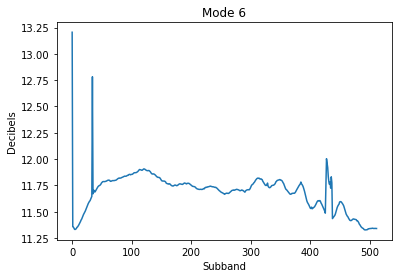

In [125]:
### MODE 6 ###

# Find the SST file
filename = input_dir + 'SST_data/exercis_x/' + '20181012_112017_sst_rcu000.dat'

# Get the filesize, and thus work out how many records to expect
filelen = os.path.getsize(filename)
datalen=filelen//8     # 8 bytes per double-precision number
num_subbands=512
num_records=datalen//num_subbands

# Read the contents of the file
fp = open(filename, 'rb')
datastruct = str(datalen)+'d'
dataraw = struct.unpack(datastruct,fp.read(filelen))
fp.close()

# Re-organise the raw data into a 2D array
data = np.reshape( dataraw, (num_records,num_subbands) )

# Switch the axes, so that xaxis=sample (i.e. time) and yaxis=subbands (freq.)
data = np.transpose(data)


# Use decibels, not linear scale
data = np.log(data, where=0<data, out=np.nan*data)
data = 10*np.log10(data)

# Average the data in the time-axis
average=np.nanmean(data, axis=1)


# Plot the results
plt.plot(average)
plt.xlabel("Subband")
plt.ylabel("Decibels")
plt.title('Mode 6')
plt.show()
